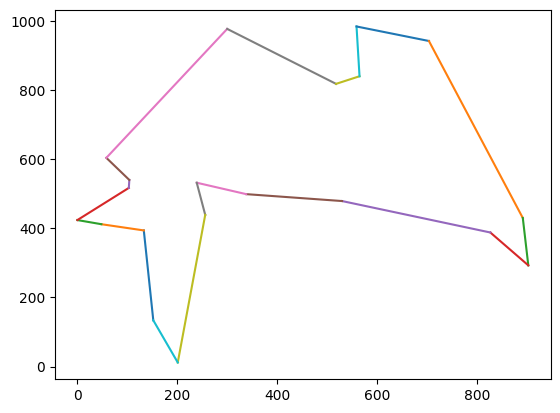

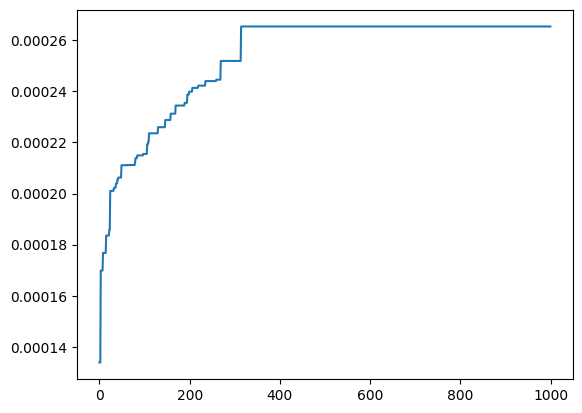

In [2]:
from math import sqrt
import random
from matplotlib import pyplot as plt
from quickga import Organism, PermutationSequenceTrait


points = [(random.randint(0,1000), random.randint(0,1000)) for i in range(20)]

def plot_path(indice_sequence):
    plot_line_segment = lambda a, b: plt.plot([a[0], b[0]], [a[1], b[1]])
    for i in range(len(indice_sequence)):
        plot_line_segment(points[indice_sequence[i]], points[indice_sequence[i-1]])
    plt.show()

class TravelingSalesman(Organism):
    def __init__(self):
        super().__init__()
        indices = [i for i in range(len(points))]
        self.add_trait('sequence', PermutationSequenceTrait(indices, mutation_type='inversion'))

    def evaluate(self):
        total_distance = 0
        distance = lambda a, b: sqrt((a[0]-b[0])**2 + (a[1]-b[1])**2)
        ordered_points = [points[i] for i in self.sequence]
        for i in range(len(ordered_points)):
            total_distance += distance(ordered_points[i], ordered_points[i-1])
        return 1/total_distance

info = TravelingSalesman.evolve(population_size=100, generations=1000, elite_rate=0.05, migration_rate=0.2)
plot_path(info[-1]['most_fit'].sequence)
plt.plot([gen['max_fitness'] for gen in info])
plt.show()